## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out_layer = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [out_layer])
    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr = 0.005)
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 84us/step - loss: 2.1517 - accuracy: 0.2124 - val_loss: 2.0405 - val_accuracy: 0.2617
Epoch 2/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.9748 - accuracy: 0.3000 - val_loss: 1.9429 - val_accuracy: 0.3125
Epoch 3/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.8903 - accuracy: 0.3392 - val_loss: 1.8848 - val_accuracy: 0.3307
Epoch 4/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.8401 - accuracy: 0.3564 - val_loss: 1.8397 - val_accuracy: 0.3445
Epoch 5/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.8042 - accuracy: 0.3694 - val_loss: 1.7940 - val_accuracy: 0.3730
Epoch 6/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.7756 - accuracy: 0.3782 - val_loss: 1.7782 - val_accuracy: 0.3705
Epoch 7/500
50000/50000 [==============================] - 4s

50000/50000 [==============================] - 4s 79us/step - loss: 1.3486 - accuracy: 0.5258 - val_loss: 1.4547 - val_accuracy: 0.4899
Epoch 55/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.3431 - accuracy: 0.5290 - val_loss: 1.4242 - val_accuracy: 0.4975
Epoch 56/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.3341 - accuracy: 0.5315 - val_loss: 1.4271 - val_accuracy: 0.4983
Epoch 57/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.3328 - accuracy: 0.5309 - val_loss: 1.4101 - val_accuracy: 0.5002
Epoch 58/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.3272 - accuracy: 0.5327 - val_loss: 1.4137 - val_accuracy: 0.4962
Epoch 59/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.3214 - accuracy: 0.5348 - val_loss: 1.4198 - val_accuracy: 0.4982
Epoch 60/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.3184 - accuracy: 0.5366 - val_loss: 

50000/50000 [==============================] - 4s 74us/step - loss: 1.1286 - accuracy: 0.6059 - val_loss: 1.3667 - val_accuracy: 0.5209
Epoch 110/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.1154 - accuracy: 0.6128 - val_loss: 1.4032 - val_accuracy: 0.5080
Epoch 111/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.1137 - accuracy: 0.6095 - val_loss: 1.4078 - val_accuracy: 0.5062
Epoch 112/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.1144 - accuracy: 0.6096 - val_loss: 1.4669 - val_accuracy: 0.4815
Epoch 113/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1085 - accuracy: 0.6129 - val_loss: 1.4018 - val_accuracy: 0.5052
Epoch 114/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1046 - accuracy: 0.6160 - val_loss: 1.3129 - val_accuracy: 0.5349
Epoch 115/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.1000 - accuracy: 0.6155 - val_

50000/50000 [==============================] - 4s 73us/step - loss: 0.9378 - accuracy: 0.6727 - val_loss: 1.3621 - val_accuracy: 0.5342
Epoch 164/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.9352 - accuracy: 0.6767 - val_loss: 1.3869 - val_accuracy: 0.5271
Epoch 165/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.9336 - accuracy: 0.6750 - val_loss: 1.5013 - val_accuracy: 0.4956
Epoch 166/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.9389 - accuracy: 0.6743 - val_loss: 1.5209 - val_accuracy: 0.4906
Epoch 167/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.9255 - accuracy: 0.6807 - val_loss: 1.4341 - val_accuracy: 0.5117
Epoch 168/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.9253 - accuracy: 0.6784 - val_loss: 1.5205 - val_accuracy: 0.4935
Epoch 169/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.9109 - accuracy: 0.6845 - val_

Epoch 218/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.7691 - accuracy: 0.7351 - val_loss: 1.5546 - val_accuracy: 0.5043
Epoch 219/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.7678 - accuracy: 0.7357 - val_loss: 1.4586 - val_accuracy: 0.5233
Epoch 220/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.7665 - accuracy: 0.7371 - val_loss: 1.5123 - val_accuracy: 0.5088
Epoch 221/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.7660 - accuracy: 0.7370 - val_loss: 1.5061 - val_accuracy: 0.5141
Epoch 222/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.7601 - accuracy: 0.7404 - val_loss: 1.6428 - val_accuracy: 0.4998
Epoch 223/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.7482 - accuracy: 0.7413 - val_loss: 1.6795 - val_accuracy: 0.4682
Epoch 224/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.7570 - accuracy:

50000/50000 [==============================] - 4s 90us/step - loss: 0.6157 - accuracy: 0.7917 - val_loss: 1.5420 - val_accuracy: 0.5291
Epoch 273/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.6131 - accuracy: 0.7934 - val_loss: 1.6589 - val_accuracy: 0.5123
Epoch 274/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.6049 - accuracy: 0.7965 - val_loss: 1.6215 - val_accuracy: 0.5130
Epoch 275/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.6073 - accuracy: 0.7959 - val_loss: 1.5268 - val_accuracy: 0.5259
Epoch 276/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.6056 - accuracy: 0.7962 - val_loss: 1.7027 - val_accuracy: 0.5050
Epoch 277/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.6060 - accuracy: 0.7955 - val_loss: 1.5512 - val_accuracy: 0.5259
Epoch 278/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.5949 - accuracy: 0.7992 - val

Epoch 327/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.4750 - accuracy: 0.8456 - val_loss: 1.9469 - val_accuracy: 0.4889
Epoch 328/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.4624 - accuracy: 0.8496 - val_loss: 1.6724 - val_accuracy: 0.5341
Epoch 329/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.4495 - accuracy: 0.8544 - val_loss: 2.2749 - val_accuracy: 0.4686
Epoch 330/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.4678 - accuracy: 0.8466 - val_loss: 1.7966 - val_accuracy: 0.5217
Epoch 331/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.4551 - accuracy: 0.8522 - val_loss: 1.7910 - val_accuracy: 0.5140
Epoch 332/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.4481 - accuracy: 0.8529 - val_loss: 1.6603 - val_accuracy: 0.5355
Epoch 333/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.4616 - accuracy:

50000/50000 [==============================] - 4s 73us/step - loss: 0.3433 - accuracy: 0.8935 - val_loss: 2.3089 - val_accuracy: 0.4595
Epoch 382/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.3249 - accuracy: 0.9008 - val_loss: 1.8099 - val_accuracy: 0.5344
Epoch 383/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.3224 - accuracy: 0.9021 - val_loss: 1.8338 - val_accuracy: 0.5355
Epoch 384/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.3244 - accuracy: 0.9024 - val_loss: 2.6464 - val_accuracy: 0.4462
Epoch 385/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3455 - accuracy: 0.9006 - val_loss: 2.2708 - val_accuracy: 0.4962
Epoch 386/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3343 - accuracy: 0.8963 - val_loss: 2.0241 - val_accuracy: 0.4993
Epoch 387/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.3335 - accuracy: 0.8975 - val_

Epoch 436/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.2111 - accuracy: 0.9423 - val_loss: 1.9911 - val_accuracy: 0.5278
Epoch 437/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.2512 - accuracy: 0.9318 - val_loss: 1.9478 - val_accuracy: 0.5349
Epoch 438/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.1685 - accuracy: 0.9600 - val_loss: 2.3574 - val_accuracy: 0.4910
Epoch 439/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.2116 - accuracy: 0.9453 - val_loss: 2.1262 - val_accuracy: 0.5258
Epoch 440/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.2131 - accuracy: 0.9419 - val_loss: 2.4501 - val_accuracy: 0.4775
Epoch 441/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.2811 - accuracy: 0.9281 - val_loss: 2.1884 - val_accuracy: 0.5088
Epoch 442/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.2519 - accuracy:

50000/50000 [==============================] - 4s 75us/step - loss: 0.0960 - accuracy: 0.9840 - val_loss: 2.4457 - val_accuracy: 0.5159
Epoch 491/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.2123 - accuracy: 0.9539 - val_loss: 2.2689 - val_accuracy: 0.5401
Epoch 492/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.1679 - accuracy: 0.9619 - val_loss: 2.2509 - val_accuracy: 0.5303
Epoch 493/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.1395 - accuracy: 0.9688 - val_loss: 2.2154 - val_accuracy: 0.5377
Epoch 494/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.1418 - accuracy: 0.9714 - val_loss: 2.3120 - val_accuracy: 0.5309
Epoch 495/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.1743 - accuracy: 0.9627 - val_loss: 2.2665 - val_accuracy: 0.5363
Epoch 496/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0881 - accuracy: 0.9858 - val_

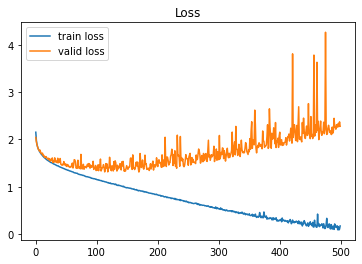

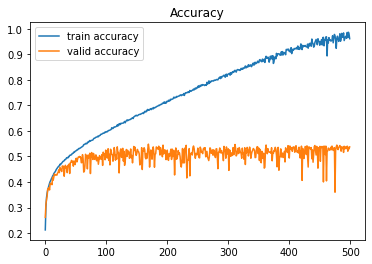

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()